# IN_SYS - SW08 - Decision Trees with California Housing Data
### 06/11/2025 - S. Lazarevic

In [24]:
!pip install xgboost

  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Import the four different ML Algorithms we want 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
# Load the dataset
data = pd.read_csv('California_Housing.csv')

In [3]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Median Income,Age of House,Average Rooms,Average Bedrooms,Population,Average Occupancy,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 1. Prepare the data

In [4]:
# Prepare the features (X) and target (y)
X = data[['Median Income', 'Age of House', 'Average Rooms', 'Average Bedrooms', 'Population', 'Average Occupancy', 'Latitude', 'Longitude']]
y = data['Price']

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. We will first use Linear Regression

In [6]:
# Create and train the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predict using the Linear Regression model
y_pred_lr = linear_regression.predict(X_test)

In [8]:
# Evaluate the Linear Regression model
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {lr_mse}")
print(f"Linear Regression R² Score: {lr_r2}")

Linear Regression Mean Squared Error: 0.5558915986952442
Linear Regression R² Score: 0.575787706032451


## 3. Now we try with the simple Decision Tree

In [9]:
# Create and train the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [10]:
# Predict using the Decision Tree
y_pred_tree = decision_tree.predict(X_test)

In [11]:
# Evaluate the Decision Tree model
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)
print(f"Decision Tree Mean Squared Error: {tree_mse}")
print(f"Decision Tree R² Score: {tree_r2}")

Decision Tree Mean Squared Error: 0.495235205629094
Decision Tree R² Score: 0.622075845135081


In [12]:
print(f"Depth of the decision tree is: {decision_tree.get_depth()}")

Depth of the decision tree is: 34


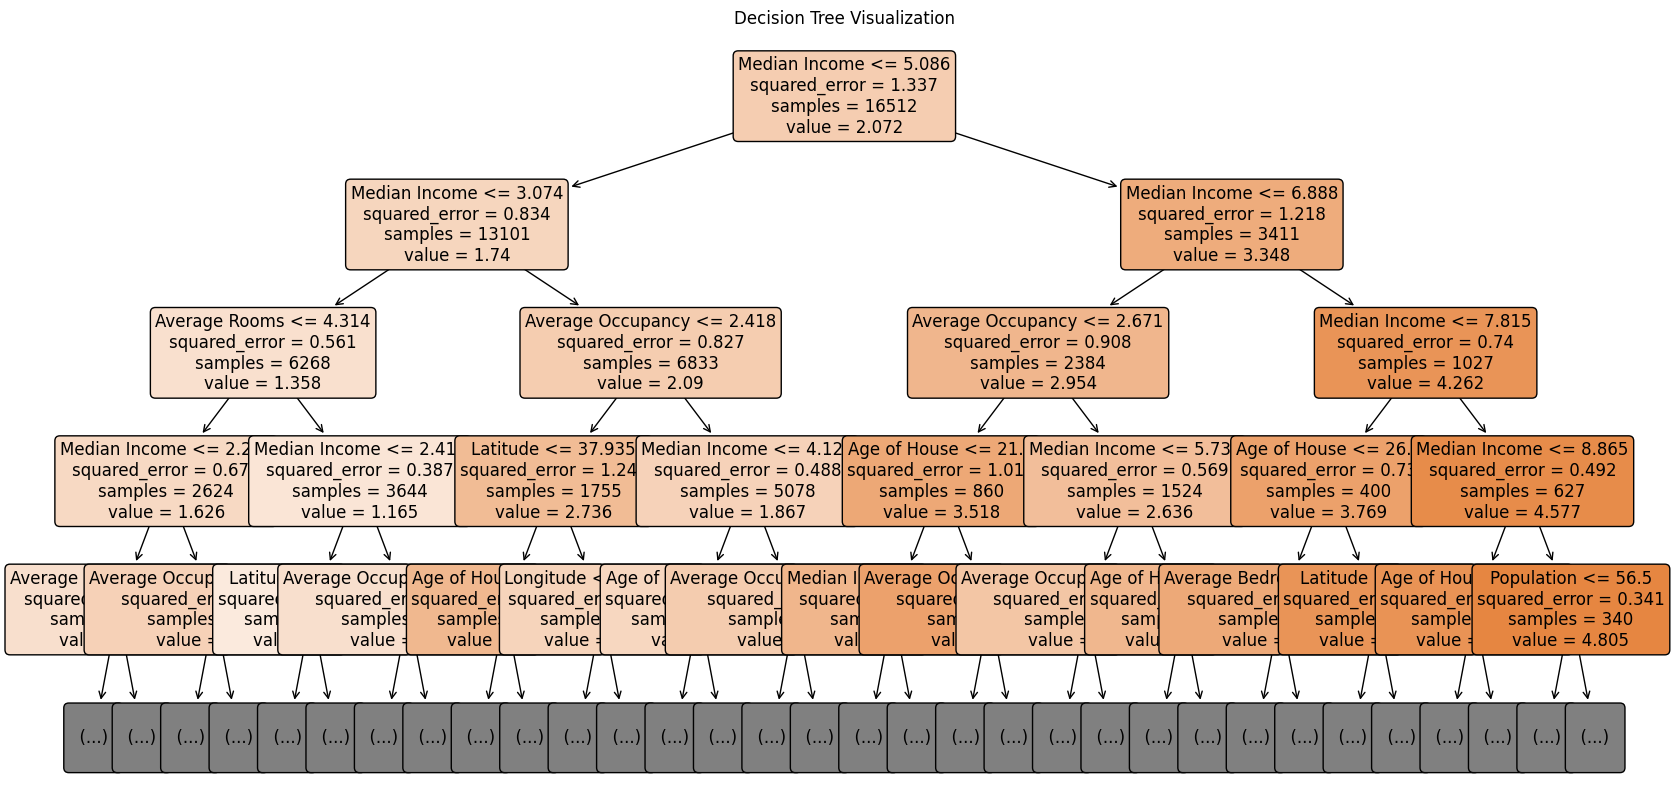

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, 
          filled=True,
          rounded=True,
          feature_names=list(X.columns),
          max_depth=4,
          fontsize=12)

plt.title("Decision Tree Visualization")
plt.show()

## 4. Let's implement Random Forest

In [14]:
# Create and train the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict using the Random Forest model
y_pred_rf = random_forest.predict(X_test)

In [15]:
# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R² Score: {rf_r2}")

Random Forest Mean Squared Error: 0.2553684927247781
Random Forest R² Score: 0.8051230593157366


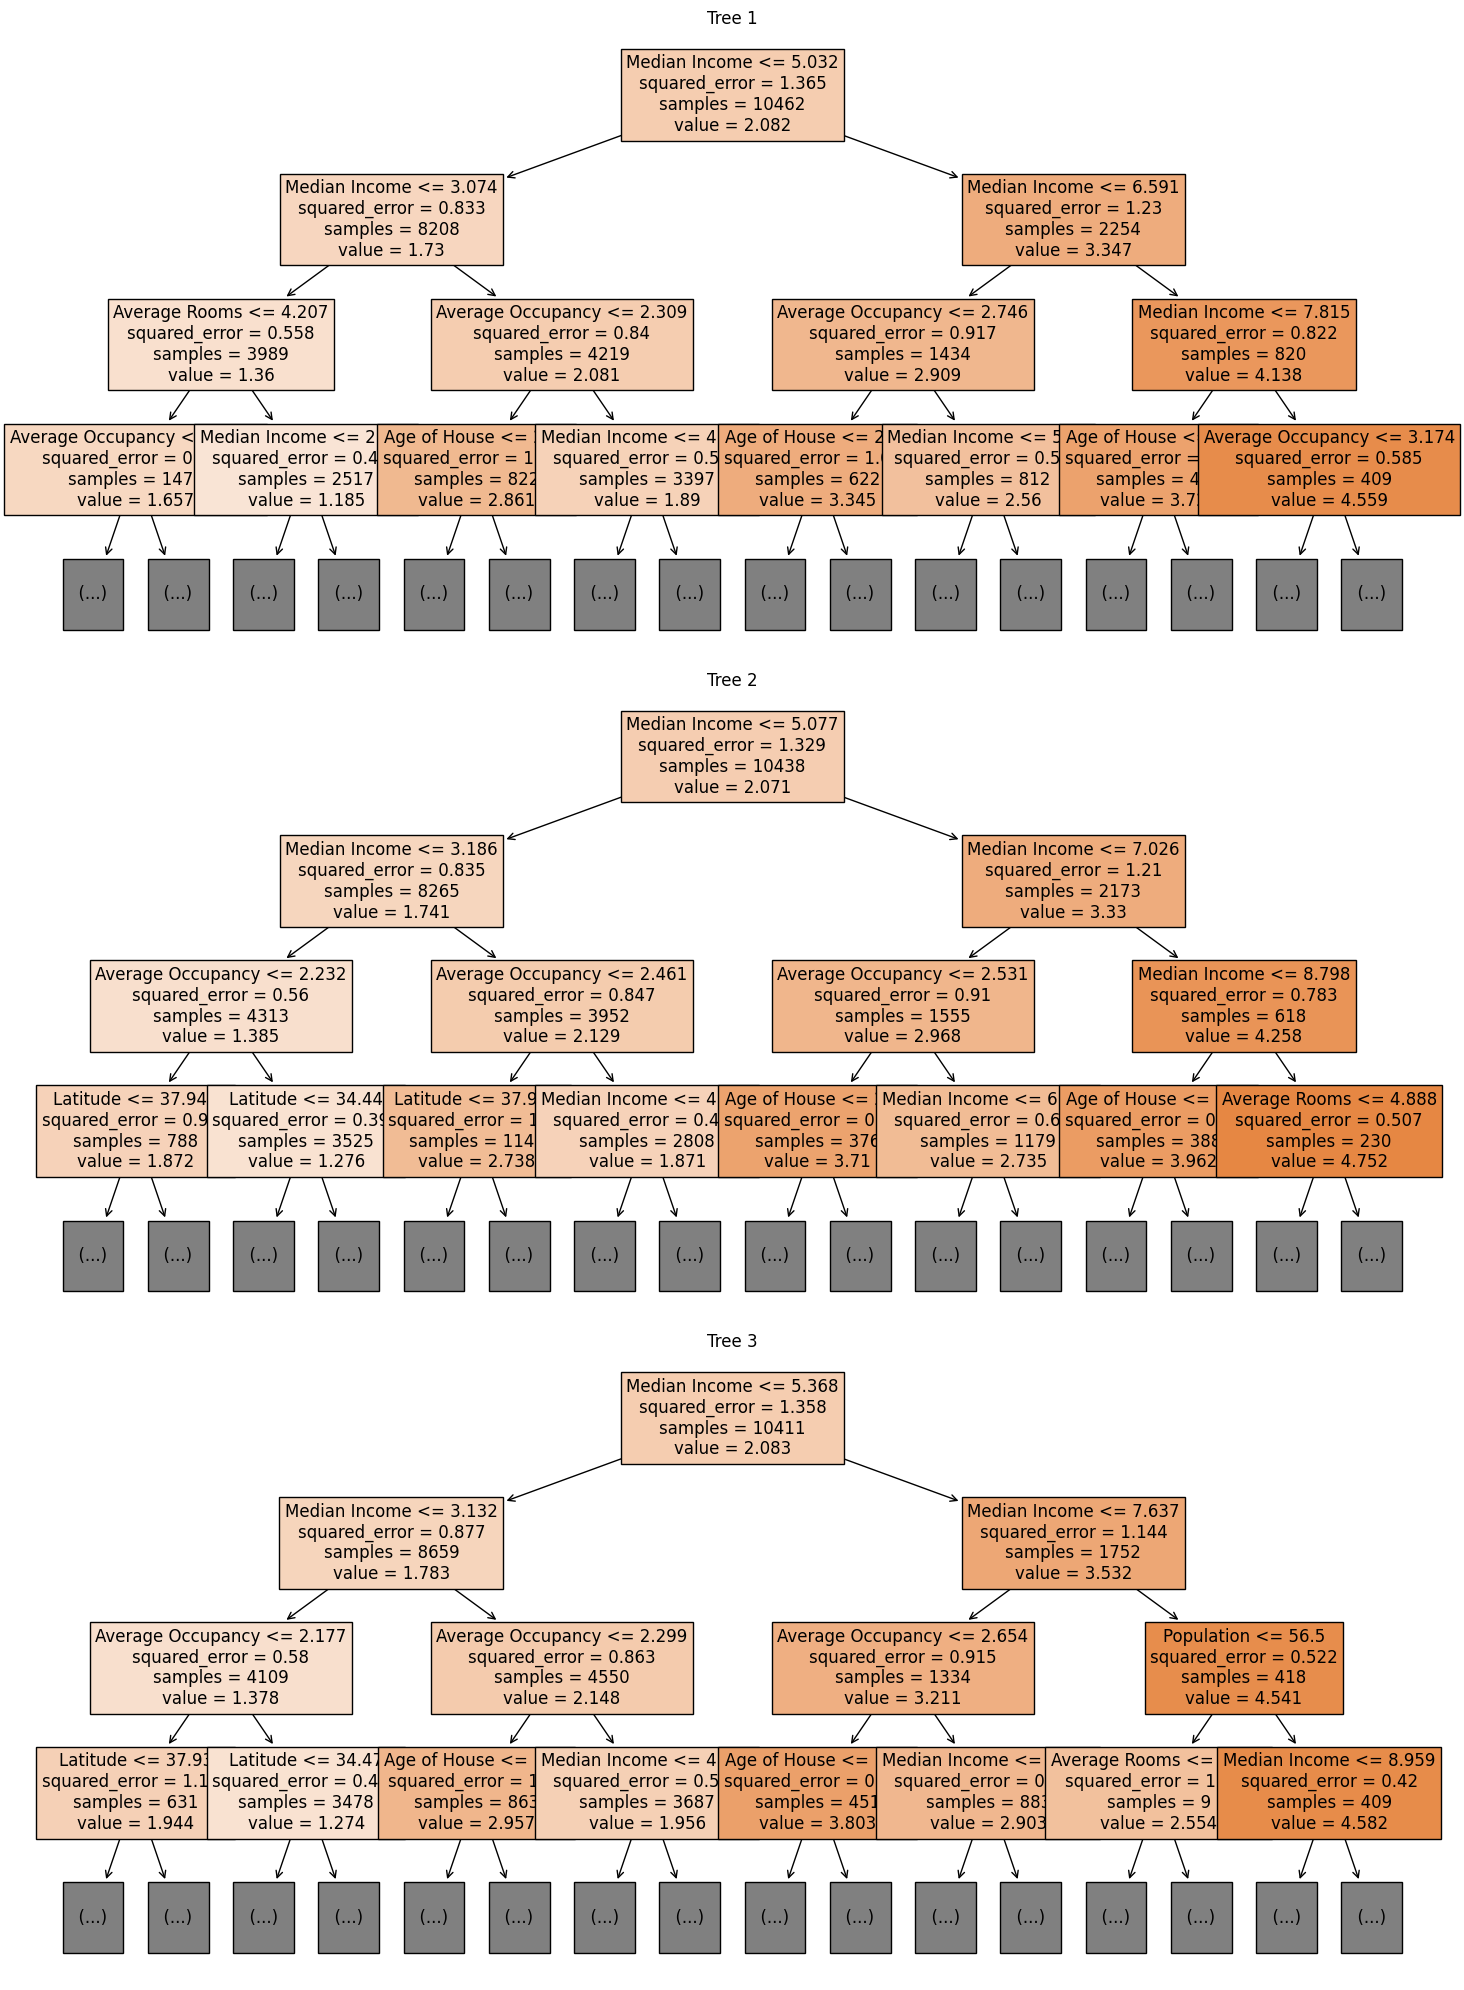

In [16]:
# Visualize the sample of the random forest (only first three trees)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))
for i, ax in enumerate(axes):
    plot_tree(random_forest.estimators_[i], 
              ax=ax,
              feature_names=list(X.columns),
              max_depth=3,
              fontsize=12,
              filled=True)
    ax.set_title(f'Tree {i+1}')

plt.tight_layout()
plt.show()

## 5. Experiment with XGBoost Decision Tree

XGBoost builds the decision trees sequentially, where each subsequent tree focuses on predicting the residual errors of the previous one. The final prediction is the weighted sum of all three predictions

In [17]:
# Create and train the XGBoost Regressor
xgboost_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgboost_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [18]:
# Predict using the XGBoost model
y_pred_xgb = xgboost_regressor.predict(X_test)

In [19]:
# Evaluate the XGBoost model
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {xgb_mse}")
print(f"XGBoost R² Score: {xgb_r2}")

XGBoost Mean Squared Error: 0.2225899267544737
XGBoost R² Score: 0.8301370561019205


# Compare the performance of these different algorithms

In [46]:
# Compare the models
print("\nModel Comparison R² Score:")
print(60*"x" + "\n")
print(f"\tLinear Regression R² Score: \t{lr_r2:.3f}")
print(f"\tDecision Tree R² Score: \t{tree_r2:.3f}")
print(f"\tRandom Forest R² Score: \t{rf_r2:.3f}")
print(f"\tXGBoost R² Score: \t\t{xgb_r2:.3f}")

print("\nModel Comparison Mean Squared Error:")
print(60*"x" + "\n")
print(f"\tLinear Regression Mean Squared Error: \t{lr_mse:.3f}")
print(f"\tDecision Tree Mean Squared Error \t{tree_mse:.3f}")
print(f"\tRandom Forest Mean Squared Error \t{rf_mse:.3f}")
print(f"\tXGBoost Mean Squared Error \t\t{xgb_mse:.3f}")

print("\n")


Model Comparison R² Score:
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

	Linear Regression R² Score: 	0.576
	Decision Tree R² Score: 	0.622
	Random Forest R² Score: 	0.805
	XGBoost R² Score: 		0.830

Model Comparison Mean Squared Error:
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

	Linear Regression Mean Squared Error: 	0.556
	Decision Tree Mean Squared Error 	0.495
	Random Forest Mean Squared Error 	0.255
	XGBoost Mean Squared Error 		0.223




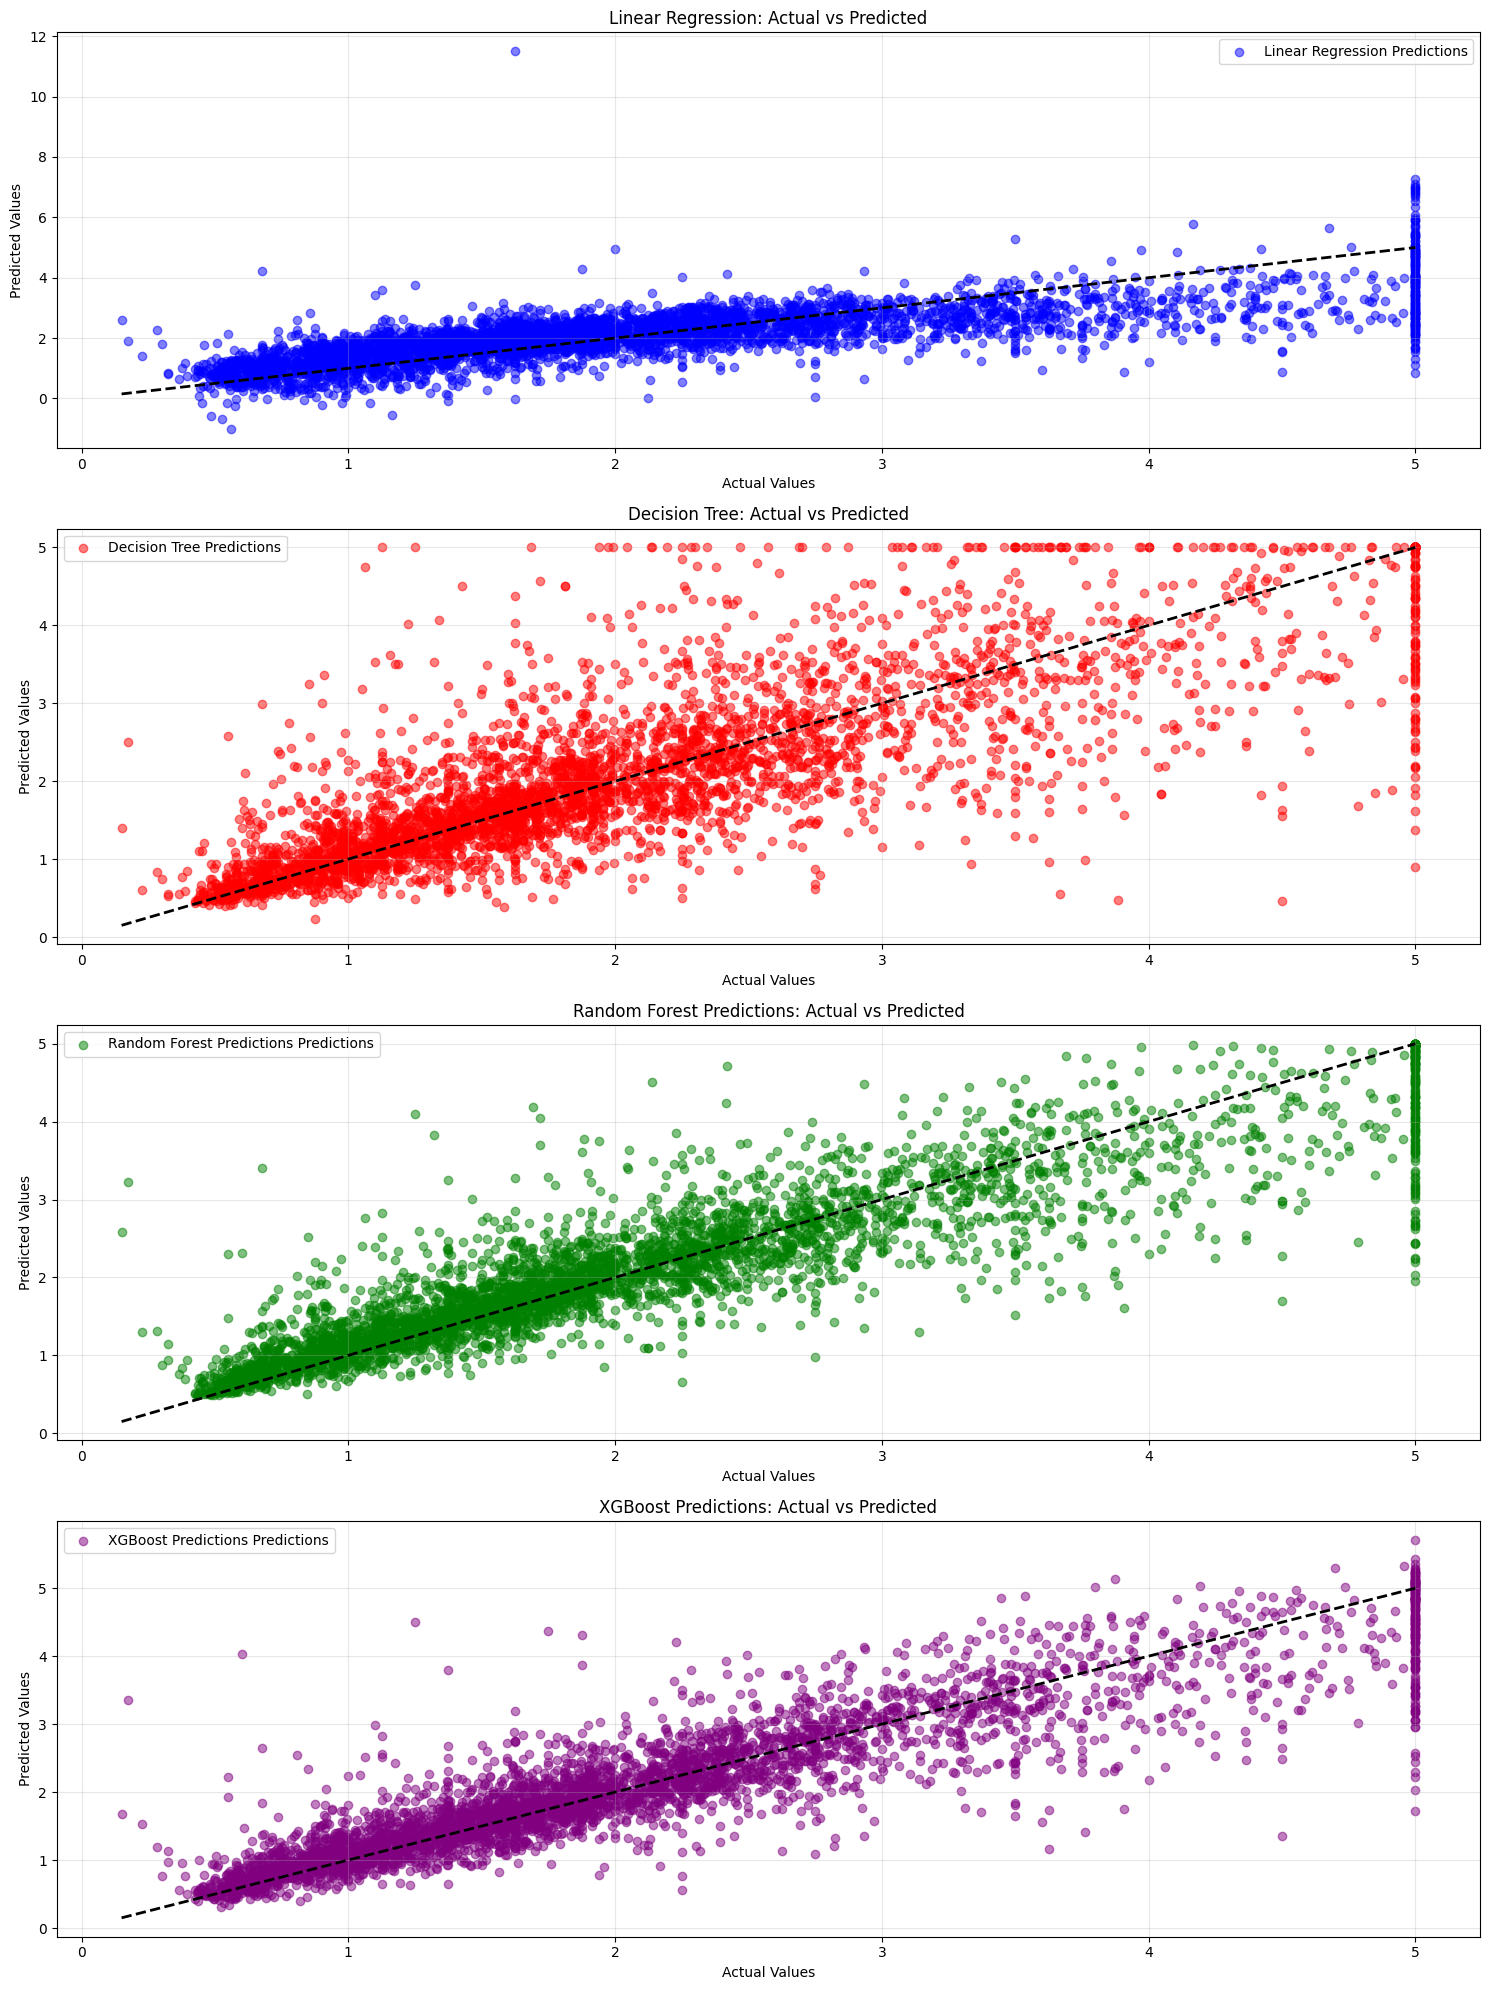

In [51]:
# Visualize predictions vs actual values for all four models (black line represent the actuals)

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))

models = [
    ('Linear Regression', y_pred_lr, 'blue'),
    ('Decision Tree', y_pred_tree, 'red'),
    ('Random Forest Predictions', y_pred_rf, 'green'),
    ('XGBoost Predictions', y_pred_xgb, 'purple')   
]

for i, (model_name, predictions, color) in enumerate(models):
    axes[i].scatter(y_test, predictions, alpha=0.5, label=f'{model_name} Predictions', color=color)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')
    axes[i].set_title(f'{model_name}: Actual vs Predicted')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

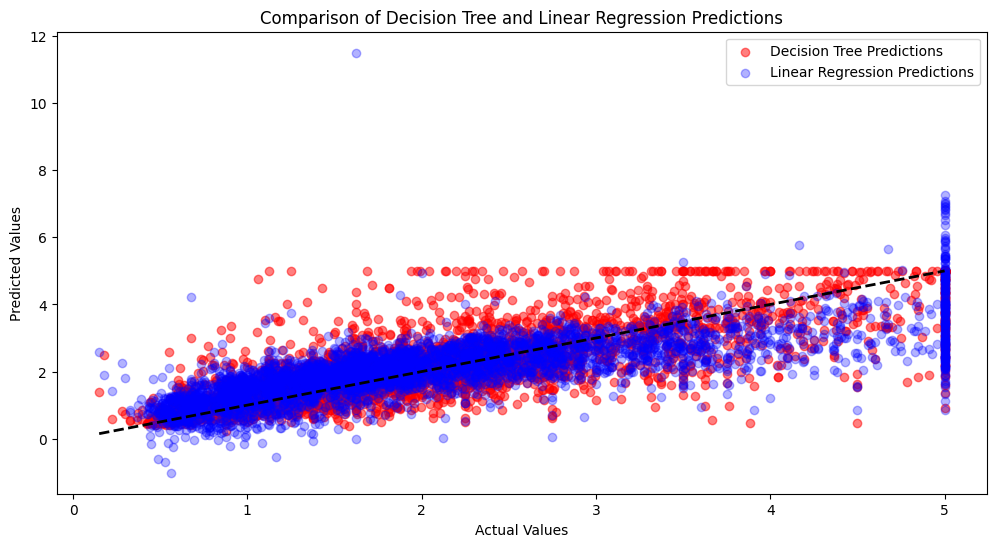

In [56]:
# Visualize predictions vs actual values for Decision Tree and Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.5, label='Decision Tree Predictions', color='red')
plt.scatter(y_test, y_pred_lr, alpha=0.3, label='Linear Regression Predictions', color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Decision Tree and Linear Regression Predictions')
plt.legend()
plt.show()
